In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

np.set_printoptions(suppress=True)
np.random.seed(666)

In [3]:
# dataset = pd.read_csv('data.csv', sep='\t', header=None, names=['X1', 'X2', 'label'])
dataset = pd.read_csv('data2.txt', sep=',', header=None, names=['X1', 'X2', 'label'])
dataset.head()
dataset.describe()

,X1,X2,label
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [22]:
x = dataset[['X1','X2']]
y = dataset['label']

0.4111323120213489
批量梯度下降算法耗时： 0.03897738456726074
迭代到第308次，结束迭代！


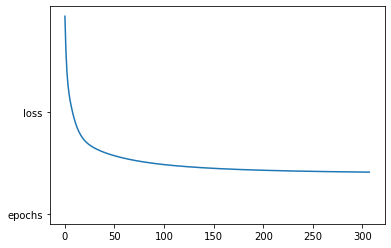

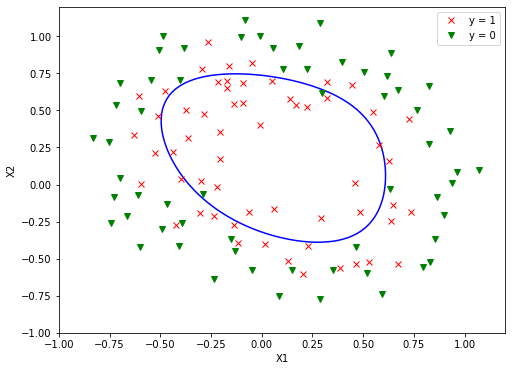

In [95]:
def make_polyFeatures(x1, x2, degree):
    m = x1.size
    features = np.ones((m, 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            features = np.c_[features, np.power(x1, i - j) * np.power(x2, j)]
                                    
    return features
    
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def cost(dataMatrix, weights, labelMatrix, lmd):
    m, n = dataMatrix.shape
    y_hat = sigmoid(dataMatrix.dot(weights))
    c = (-1.0/m) * np.sum(labelMatrix * np.log(y_hat) + (1 - labelMatrix) * np.log(1 - y_hat)) + (lmd/(2*m)) * np.sum(weights.T.dot(weights))
    return c

def gradDescent(dataMat, labelMat, alpha=0.01, maxepochs=500, epsilion=1e-4, lmd=1):
    dataMatrix = np.array(dataMat)
    labelMatrix = np.array(labelMat).reshape((-1,1))
    m, n = dataMatrix.shape
    bias_column = np.array([1 for i in range(m)])
    dataMatrix = np.column_stack((dataMatrix, bias_column))
    m, n = dataMatrix.shape
    weights = np.ones((n, 1))
    epoch_count = 0
    loss_list = []
    epoch_list = []
    starttime = time.time()
    while epoch_count < maxepochs:
        loss = cost(dataMatrix, weights, labelMatrix, lmd)
        y_hat = sigmoid(dataMatrix.dot(weights))
        error = labelMatrix- y_hat
        last_weights = weights
        normal_gradient = -(1.0/m) * dataMatrix.T.dot(error)
        gradient = normal_gradient[:-1] + (1.0/m) * lmd * weights[:-1]
        gradient = np.row_stack((gradient, normal_gradient[-1]))
        weights = last_weights - alpha * gradient
        loss_new = cost(dataMatrix, weights, labelMatrix, lmd)
        if abs(loss_new - loss) < epsilion:
            break
        loss_list.append(loss_new)
        epoch_list.append(epoch_count)
        epoch_count += 1
    print(loss_new)
    print("批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epoch_count))
    plt.plot(epoch_list, loss_list)
    plt.plot('epochs')
    plt.plot('loss')
    plt.show()
    return weights

def sGradientDescent(dataMat, labelMat, alpha=0.01, maxepochs=500, epsilion=1e-4, lmb=1):
    dataMatrix = np.array(x)
    m, n = dataMat.shape
    bias_column = [1 for i in range(m)]
    dataMatrix = np.column_stack((dataMatrix, bias_column))
    labelMatrix = np.array(y)
    labelMatrix = labelMatrix.reshape((-1, 1))
    m, n = dataMatrix.shape
    weights = np.ones((n, 1))
    epoch_count = 0
    loss_list = []
    epoch_list = []
    starttime = time.time()
    while epoch_count < maxepochs:
        rand_i = np.random.randint(m)
        loss = cost(dataMatrix, weights, labelMatrix, lmb)
        y_hat = sigmoid(dataMatrix[rand_i, :].dot(weights))
        error = labelMatrix[rand_i] - y_hat
        normal_gradient = -dataMatrix[rand_i, :].reshape(-1, 1).dot(error.reshape(-1, 1))
        gradient = normal_gradient[:-1] + (1.0/m) * lmb * weights[:-1]
        gradient = np.row_stack((gradient, normal_gradient[-1]))
        weights = weights - alpha * gradient
        loss_new = cost(dataMatrix, weights, labelMatrix, lmb)
        if abs(loss_new - loss) < epsilion:
            break
        loss_list.append(loss_new)
        epoch_list.append(epoch_count)
        epoch_count += 1
    print(loss_new)
    print("随机梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epoch_count))
    plt.plot(epoch_list, loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights

def mBGradDescent(dataMat, labelMat, alpha=0.01, batch_size=10, maxepochs=500, epsilion=1e-4, lmb=1):
    dataMatrix = np.array(dataMat)
    m, n = dataMatrix.shape
#     bias_column = [1 for i in range(m)]
#     dataMatrix = np.column_stack((dataMatrix, bias_column))
#     labelMatrix = np.array(labelMat).reshape(-1, 1)
    m, n = dataMatrix.shape
    weights = np.ones((n, 1))
    epoch_count = 0
    loss_list = []
    epoch_list = []
    starttime = time.time()
    while epoch_count < maxepochs:
        loss = cost(dataMatrix, weights, labelMatrix, lmb)
        rand_indexes = np.random.choice(range(m), batch_size, replace=False) #参数replace 用来设置是否可以取相同元素：True表示可以取相同数字；False表示不可以取相同数字。默认是True
        y_hat = sigmoid(dataMatrix[rand_indexes].dot(weights))
        error = labelMatrix[rand_indexes] - y_hat
        normal_gradient = (-1.0/batch_size) * dataMatrix[rand_indexes].T.dot(error)
        gradient = normal_gradient[:-1] + (1.0/m) * lmb * weights[:-1]
        gradient = np.row_stack((gradient, normal_gradient[-1]))
        weights = weights - alpha * gradient
        loss_new = cost(dataMatrix, weights, labelMatrix, lmb)
        if abs(loss_new - loss) < epsilion:
            break
        loss_list.append(loss_new)
        epoch_list.append(epoch_count)
        epoch_count += 1
    print(loss_new)
    print("小批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epoch_count))
    plt.plot(epoch_list, loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights
    
        
def plotBsetFit(gd_weights, sgd_weights, mbgd_weights):
    x1_positive, x1_negative = [], []
    x2_positive, x2_negative = [], []
    m, n = x.shape
    dataMatrix = np.array(x)
    labelMatrix = np.array(y)
    for i in range(m):
        if labelMatrix[i] == 1:
            x1_positive.append(dataMatrix[i][0])
            x2_positive.append(dataMatrix[i][1])
        else:
            x1_negative.append(dataMatrix[i][0])
            x2_negative.append(dataMatrix[i][1])
    plt.figure(figsize=(8, 6))
    plt.plot(x1_positive, x2_positive, 'ro')
    plt.plot(x1_negative, x2_negative, 'bo')
    x_range = np.arange(-3.0, 3.0, 0.1)
    y_range = (-gd_weights[2] - gd_weights[0] * x_range) /gd_weights[1]
    y_range_sgd = (-sgd_weights[2] - sgd_weights[0] * x_range) /sgd_weights[1]
    mbgd_weights = (-mbgd_weights[2] - mbgd_weights[0] * x_range) /mbgd_weights[1]
    plt.plot(x_range, y_range, color='g')
    plt.plot(x_range, y_range_sgd, color = 'orange')
    plt.plot(x_range, mbgd_weights, color = 'purple')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

def plotDecisionBoundary(weights, degree):
    x1_positive, x1_negative = x[y == 1]['X1'], x[y == 0]['X1']
    x2_positive, x2_negative = x[y == 1]['X2'], x[y == 0]['X2']
    m, n = x.shape
    plt.figure(figsize=(8, 6))
    plt.plot(x1_positive, x2_positive, 'rx')
    plt.plot(x1_negative, x2_negative, 'gv')
    x_range = np.linspace(-1, 1.2, 100)
    x1, x2 = np.meshgrid(x_range, x_range)
    z = make_polyFeatures(x1.ravel().reshape(-1, 1), x2.ravel().reshape(-1,1), degree)
#     z = np.column_stack((z, np.ones((z.shape[0],1))))
    z = z.dot(weights[:-1,:]).reshape(x1.shape)
#     u = np.linspace(-1, 1.5, 50)
#     v = np.linspace(-1, 1.5, 50)
#     z = np.zeros((u.size, v.size))
#     for i in range(0, u.size):
#         for j in range(0, v.size):
#             z[i, j] = np.dot(make_polyFeatures(u[i], v[j], degree), weights[:-1,:])

#     z = z.T
#     plt.contour(u, v, z, 0, colors=['b'])
    plt.contour(x1, x2, z, 0, colors=['b'])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(['y = 1', 'y = 0'])
    plt.show()

def main():
    dataMatrix = np.array(x)
    degree = 6
    data = make_polyFeatures(dataMatrix[:, 0].reshape(-1, 1), dataMatrix[:, 1].reshape(-1, 1), degree)
    gd_weights = gradDescent(data, y, maxepochs=3000, lmd=0.1, alpha=1)
    plotDecisionBoundary(gd_weights, degree)
#     gd_weights = gradDescent(x, y, maxepochs=1000, lmd=0.1)
#     sgd_weights = sGradientDescent(x, y, maxepochs=1000, lmb=0.1)
#     mbgd_weights = mBGradDescent(x, y, batch_size=50, maxepochs=1000, lmb=0.1)
#     plotBsetFit(gd_weights, sgd_weights, mbgd_weights)
#     print(gd_weights, sgd_weights, mbgd_weights)

if __name__=='__main__':
    main()